Problem 6-2 \
Assignment 6 \
\
group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

In [2]:
# Install a pip package in the current Jupyter kernel
! pip install numpy pandas networkx matplotlib powerlaw

In [27]:
import pandas as pd
import networkx as nx
import numpy as np

#read data
path = '/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-6/facebook-links.txt.anon'
data = pd.read_csv(path, delimiter='\t', names=['source','target','time-stamp'])
#remove time-stamp
data = data.drop(columns=['time-stamp'])
print(data.head())

   source  target
0       1       2
1       1       3
2       1       4
3       1       5
4       1       6


In [31]:
def generate_graph(data, plot=True):
    '''
    creates an undirected graph from a pandas dataframe with nodes connected between columns "source" and "target". If there are more than 1 links between two nodes, these are removed. 
    param data: pandas dataframe
    param plot: if True, the generated graph is plotted
    '''
    g=nx.from_pandas_edgelist(data,source='source', target='target', create_using=nx.DiGraph())
    g=g.to_undirected(reciprocal=False, as_view=False)
    print("Amount of nodes:", len(g.nodes))
    print("Amount of edges:",len(g.edges))

    #control to not having multiple edges
    for node in g.nodes(): 
        # We look for adjacent nodes
        for adj_node in g[node]: 
            # If our graph has several edges from the first to the adjacent node
            if len(g[node][adj_node]) > 1: 
                print(node, adj_node)

    if plot==True:
        pos = nx.spring_layout(g, seed=1)
        nx.draw_networkx_edges(g, pos=pos)

    return g

In [32]:
g = generate_graph(data, plot=False)

Amount of nodes: 63731
Amount of edges: 817090


In [41]:
#6.2.1
def average_k(g):
    """
    creates three lists: One with the entries of number of friends, one with the entries of number of firends of friends, and one with the average number of firends of friends.
    param g: graph 
    """
    number_of_friends=[]
    number_of_friends_of_friends=[]
    for node in g.nodes():
        #count friends
        number_of_friends.append(len(g[node]))
        for adj_node in g[node]:
            #count friends of friends
            number_of_friends_of_friends.append(len(g[adj_node]))
    average_number_of_friends_of_friends =  list(nx.average_neighbor_degree(g).values())
    print('average number of friends: ', np.mean(number_of_friends))
    print('average number of friends of friends (FOF): ', np.mean(number_of_friends_of_friends))
    print('average number of average number of friends of friends (FOF): ', np.mean(average_number_of_friends_of_friends))
    return number_of_friends, number_of_friends_of_friends, average_number_of_friends_of_friends

In [76]:
import matplotlib.pyplot as plt
def plot(data_list, name_list):
    """
    Plot of degree distribution in log log scale. 
    param data_list: list of list of degrees
    param name_list: list of label_names
    """
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(1, 1, 1)

    for id, data in enumerate(data_list):
        data, bin_edges= np.histogram(data, bins=np.logspace(np.log10(1), np.log10(10000), 75), range=None, normed=None, weights=None, density=True)
        x = bin_edges+(bin_edges[1]-bin_edges[0])/2
        #plotting
        ax.scatter(x[:-1], data, label=name_list[id])
        ax.set_xlabel('Degree (d)', fontsize=20)
        ax.set_ylabel('Frequency', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend()
        plt.title('degree distribution', fontsize=25)

average number of friends:  25.641838351822503
average number of friends of friends (FOF):  88.03001138185512
average number of average number of friends of friends (FOF):  58.3634028072132


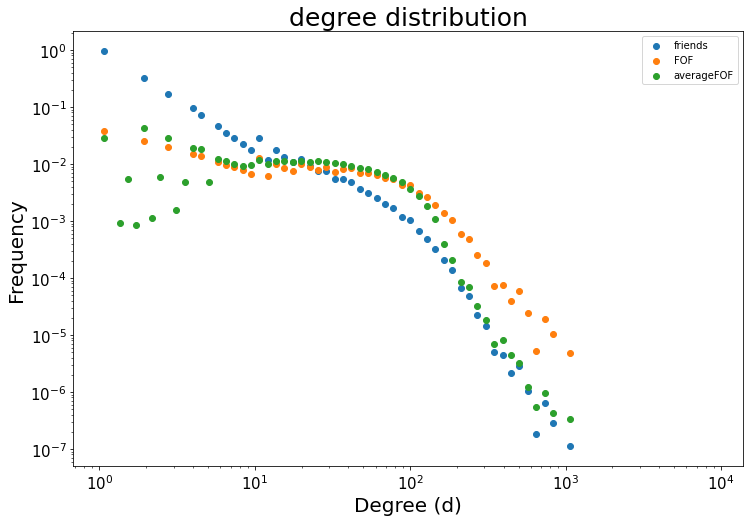

In [78]:
#6.2.2
number_of_friends, number_of_friends_of_friends, average_number_of_friends_of_friends=average_k(g)
plot([number_of_friends, number_of_friends_of_friends, average_number_of_friends_of_friends], ['friends', 'FOF', 'averageFOF'])


average number of friends:  13.9902
average number of friends of friends (FOF):  34.98122971794542
average number of average number of friends of friends (FOF):  36.634352617698816


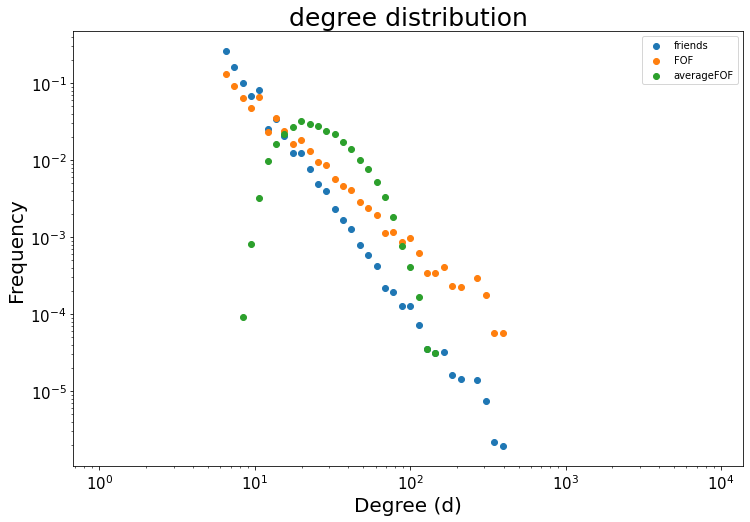

In [77]:
#6.2.3
g_random =nx.barabasi_albert_graph(n=10000, m=7, seed=2,)
number_of_friends, number_of_friends_of_friends, average_number_of_friends_of_friends=average_k(g_random)
plot([number_of_friends, number_of_friends_of_friends, average_number_of_friends_of_friends], ['friends', 'FOF', 'averageFOF'])


As the plots show, the degree distribution of the number of friends of friends (green and orange) has generally a higher frequency at higher degrees than the degree distribution of the number of friends. This means that, in general, your friends have more friends than yourself. This phenomenon is valid for both real and random networks. 